# Exploratory Data Analysis

In this kernel I will explore the 911 data. I originally ran this analysis for the Udemy course on Python for Data Science and Machine Learning, but decided to publish it here in a kernel as well.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

911.csv



In [2]:
df = pd.read_csv('../input/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188751 entries, 0 to 188750
Data columns (total 9 columns):
lat          188751 non-null float64
lng          188751 non-null float64
desc         188751 non-null object
zip          165755 non-null float64
title        188751 non-null object
timeStamp    188751 non-null object
twp          188687 non-null object
addr         188751 non-null object
e            188751 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 13.0+ MB


In [4]:
df.describe()

,lat,lng,zip,e
count,188751.000000,188751.000000,165755.000000,188751.0
mean,40.159261,-75.316977,19235.997545,1.0
std,0.090389,0.165025,316.326030,0.0
min,30.333596,-95.595595,17555.000000,1.0
25%,40.100344,-75.393021,19038.000000,1.0
50%,40.144844,-75.304635,19401.000000,1.0
75%,40.229008,-75.211735,19446.000000,1.0
max,41.167156,-74.813670,77316.000000,1.0


In [5]:
print('Most occuring zip codes: \n')
print(df['zip'].value_counts().head())
print('\n\nMost occuring townships: \n')
print(df['twp'].value_counts().head())
print('\n\nAmount of unique titles:')
print(df['title'].nunique())

Most occuring zip codes: 

19401.0    13103
19464.0    12738
19403.0     9485
19446.0     9091
19406.0     6208
Name: zip, dtype: int64


Most occuring townships: 

LOWER MERION    16214
ABINGTON        11498
NORRISTOWN      10959
UPPER MERION     9827
CHELTENHAM       8641
Name: twp, dtype: int64


Amount of unique titles:
124


EMS        94045
Traffic    66602
Fire       28104
Name: Reason, dtype: int64


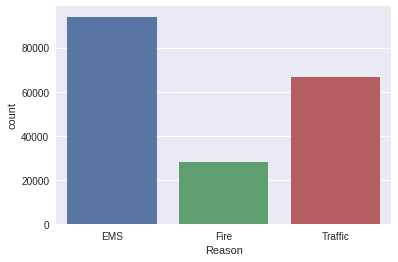

In [6]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
print(df['Reason'].value_counts())

sns.countplot(x = 'Reason', data = df)
plt.show()

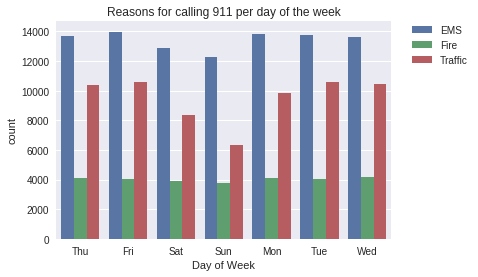

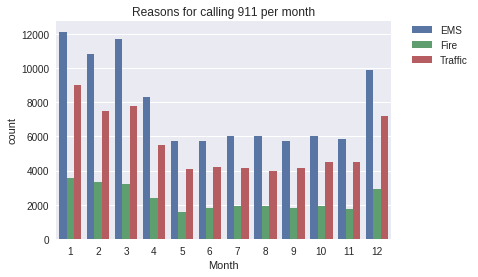

In [7]:
# From string to datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Splitting into hour, month and day
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

# Day of the week to label
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(lambda x: dmap[x])

# Plots, making sure the legend is next to the plot and doesn't cover the bars
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason').set(title='Reasons for calling 911 per day of the week')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
sns.countplot(x = 'Month', data = df, hue = 'Reason').set(title='Reasons for calling 911 per month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the first graph we can see that 911 calls for fire do not differ per day of the week at all. Of course a fire is not going to stop itself because it's a Sunday. However, for traffic we do see a clear dip in the weekend, especially on Sundays.

There seem to be much more 911 calls in the winter months for all three reasons. 

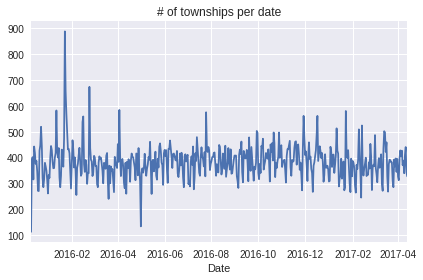

In [8]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.groupby('Date').count()['twp'].plot().set(title='# of townships per date')
plt.tight_layout()

### Let's split this up per reason for calling.

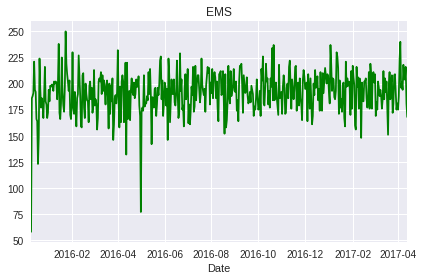

In [9]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(color='green')
plt.title('EMS')
plt.tight_layout()

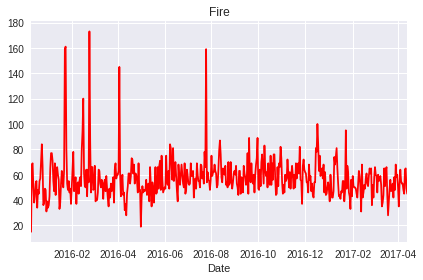

In [10]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(color='red')
plt.title('Fire')
plt.tight_layout()
plt.show()

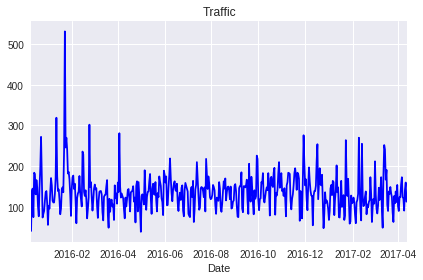

In [11]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(color='blue')
plt.title('Traffic')
plt.tight_layout()
plt.show()

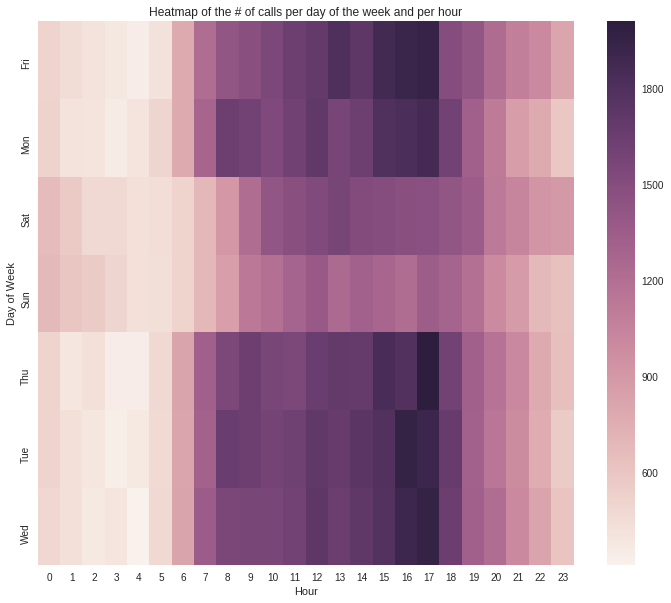

In [12]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dayHour).set(title='Heatmap of the # of calls per day of the week and per hour')
plt.show()

Most calls happen during the day, most busy hours are from 15:00-17:00.
Once again we see that the number of 911 calls is less during the weekend.

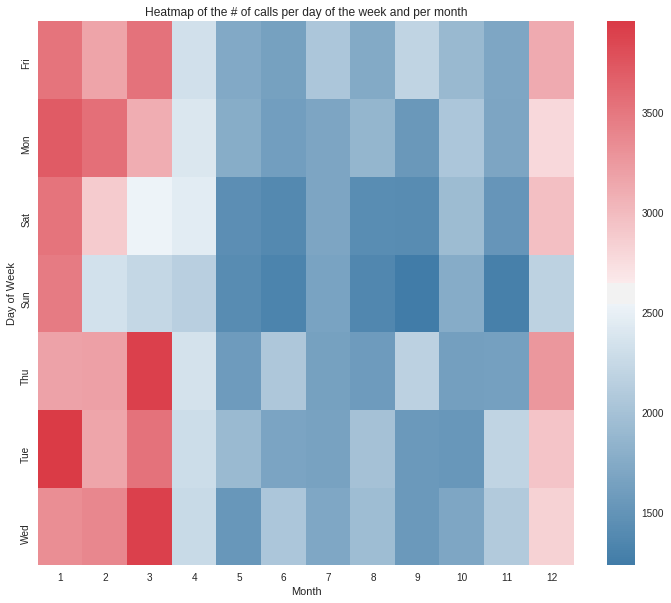

In [13]:
# Create day/month
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

# Get color palette as cmap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dayMonth, cmap=cmap).set(title='Heatmap of the # of calls per day of the week and per month')
plt.show()

And once again we see that the amount of calls is much higher during the winter months.